<a href="https://colab.research.google.com/github/AmanRajput997/California-House-Pricing/blob/main/California_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import Dataset

In [2]:
from sklearn.datasets import fetch_california_housing
boston = fetch_california_housing()

Lets check the description of the dataset

In [3]:
boston.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(boston.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
print(boston.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [6]:
print(boston.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [7]:
boston.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Preparing the Dataset

In [8]:
dataset = pd.DataFrame(boston.data,columns=boston.feature_names)

In [9]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
dataset['Price'] = boston.target

In [11]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


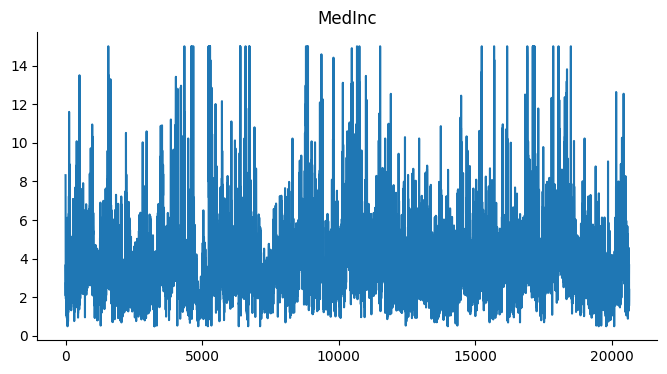

In [12]:
# @title MedInc

from matplotlib import pyplot as plt
dataset['MedInc'].plot(kind='line', figsize=(8, 4), title='MedInc')
plt.gca().spines[['top', 'right']].set_visible(False)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [14]:
#Summarizing the stats of the data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [15]:
#chech the missing dataset values
dataset.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [16]:
#Exploratory Data Analysis
#Correlation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [ ]:
import seaborn as sns
sns.pairplot(dataset)

In [ ]:
plt.scatter(dataset['MedInc'],dataset['HouseAge'])
plt.xlabel("MedInc")
plt.ylabel("HouseAge")

In [ ]:
plt.scatter(dataset['HouseAge'],dataset['AveRooms'])
plt.ylabel("AveRooms")
plt.xlabel("HouseAge")

In [ ]:
import seaborn as sns
sns.regplot(x="MedInc",y="Price",data=dataset)

In [ ]:
sns.regplot(x="Latitude",y="Longitude",data=dataset)

In [ ]:
#Independent and Dependent features
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [ ]:
x.head()

In [ ]:
y

In [ ]:
#Tain Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


In [ ]:
X_train

In [ ]:
X_test

In [ ]:
#satndardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
X_train

In [ ]:
X_test

Model Training

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regression=LinearRegression()

In [ ]:
regression.fit(X_train,y_train)

In [ ]:
print(regression.coef_)

In [ ]:
print(regression.intercept_)

In [ ]:
# on which parameters the model has been trained
regression.get_params()

In [ ]:
reg_pred=regression.predict(X_test)

In [ ]:
reg_pred

In [ ]:
#plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [ ]:
# residuals
residuals=y_test-reg_pred

In [ ]:
residuals

In [ ]:
#Plot this residuals
sns.displot(residuals,kind="kde")

In [ ]:
#Scatter plot with respect to prediction and residuals
#uniform distribution
plt.scatter(reg_pred,residuals)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

R square and adjusted R square

Formula
R^2 = 1 - SSR/SST
R^2 = coefficient of detemination SSR = um of squares of residuals SST = total sum of squares

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]
where:
R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [ ]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

New Data Predictions

In [ ]:
boston.data[0].reshape(1,-1)

In [ ]:
scaler.transform(boston.data[0].reshape(1,-1))

In [ ]:
regression.predict(scaler.transform(boston.data[0].reshape(1,-1)))

Pickling The model file for Deployment

In [ ]:
import pickle

In [ ]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [ ]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [ ]:
#Prediction
pickled_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))